In [1]:
import matplotlib.pyplot as plt
import random


In [2]:
def collusion_scenario(p, epsilon, time_steps=1000, gas_target=12500000, init_bf=32*(10**9)):
    
    block_sizes = [gas_target]
    mempool = 12500000
    revenue = []
    mem_overfilled = mempool > 25000000
    base_fee = [init_bf] #unit in wei
    for i in range(time_steps - 1):
        colluding = random.random() < p
        if colluding:
            mined_amount = gas_target - epsilon
            mempool -= mined_amount
            new_basefee = (base_fee[i]*(1+1/8*((mined_amount-gas_target)/gas_target)))
            base_fee.append(new_basefee)
            block_sizes.append(mined_amount)
            revenue.append(mined_amount * 100)
        else:
            mined_amount = 25000000 if mem_overfilled else mempool
            mempool -= mined_amount
            new_basefee = (base_fee[i]*(1+1/8*((mined_amount-gas_target)/gas_target)))
            base_fee.append(new_basefee)
            block_sizes.append(mined_amount)
            revenue.append(mined_amount * 100)
        mempool += 12500000
    return base_fee, block_sizes, revenue

In [3]:
sim = collusion_scenario(.25, 1000000, 500)
basefee_data = sim[0]
blocksize_data = sim[1]
revenue_data = sim[2]

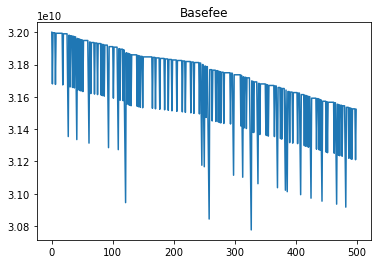

In [4]:
plt.title("Basefee")
plt.plot(basefee_data)

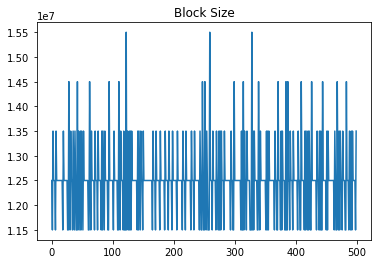

In [7]:
plt.title("Block Size")
plt.plot(blocksize_data)

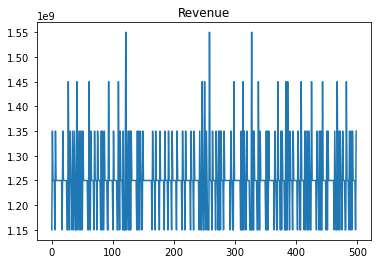

In [8]:
plt.title("Revenue")
plt.plot(revenue_data)